### Install Following Dependencies :

In [1]:
# pip install tf_bodypix tfjs_graph_converter opencv-python matplotlib

### Import Dependecies :

In [2]:
import tensorflow as tf
from tf_bodypix.api import download_model,load_model,BodyPixModelPaths
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Detections

In [3]:
bodypixmodel = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()

    # body pix segmentation
    result = bodypixmodel.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame , frame , mask=mask)

    cv2.imshow("BodyPix" , masked_image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### Add Virtual Background

In [11]:
frame.shape

(480, 640, 3)

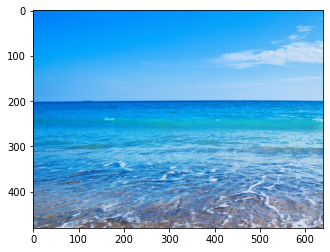

In [13]:
img = cv2.imread("beach.jpg")
img = img[:480 , :640 , :] # convert to same size as webcam frame

plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [15]:
# apply virtual background
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()

    # body pix segmentation
    result = bodypixmodel.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame , frame , mask=mask)

    # apply virtual background
    neg = np.add(mask, -1)
    inverse = np.where(neg==-1, 1 , neg).astype(np.uint8)
    masked_background = cv2.bitwise_and(img , img , mask = inverse)
    final = cv2.add(masked_image,masked_background)


    cv2.imshow("BodyPix" , final)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
q